In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/sohamajmera/Downloads/SuperStore.csv')

In [5]:
data

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,1/1/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,1/2/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,1/2/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.980,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,1/3/2019,1/5/2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,1/3/2019,1/8/2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,-5.2640,NaN,Online,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,907,CA-2020-143259,12/30/2020,1/3/2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4,12.1176,NaN,COD,NaN,NaN
5897,1297,CA-2020-115427,12/30/2020,1/3/2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1.0,Online,NaN,NaN
5898,5092,CA-2020-156720,12/30/2020,1/3/2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,NaN,Online,NaN,NaN
5899,909,CA-2020-143259,12/30/2020,1/3/2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3,19.7910,NaN,COD,NaN,NaN


In [7]:
data.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,1/1/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,1/2/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,1/2/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,1/3/2019,1/5/2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,1/3/2019,1/8/2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [37]:
print("Columns in dataset:", data.columns)

Columns in dataset: Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'ind1',
       'ind2', 'Year', 'Month'],
      dtype='object')


In [19]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data = data.dropna(subset=['Order Date'])

In [21]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [23]:
required_columns = ['Quantity', 'Profit', 'Year', 'Month']
if 'Discount' in data.columns:
    required_columns.append('Discount')

In [25]:
data = data.dropna(subset=required_columns)

In [27]:
X = data[required_columns]
y = data['Sales']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
try:
    y_pred = model.predict(X_test)
    print("Predictions on test set completed.")
except Exception as e:
    print("Error during prediction:", e)

Predictions on test set completed.


In [43]:
if 'y_pred' in locals():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

Mean Squared Error: 249485.7434928291
R-squared: 0.20075250885629592


In [45]:
future_dates = pd.date_range(data['Order Date'].max() + pd.Timedelta(days=1), periods=15, freq='D')
future_df = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Quantity': np.random.randint(1, 20, size=(15,)),   # Example random Quantity data, adjust as needed
    'Profit': np.random.uniform(10, 500, size=(15,))     # Example random Profit data, adjust as needed
})

In [47]:
if 'Discount' in data.columns:
    future_df['Discount'] = np.random.uniform(0.0, 0.5, size=(15,))

In [51]:
missing_cols = set(X_train.columns) - set(future_df.columns)
for col in missing_cols:
    future_df[col] = 0 

In [53]:
future_df = future_df[X_train.columns]

In [55]:
future_sales_pred = model.predict(future_df)

In [59]:
future_df.to_csv('/Users/sohamajmera/Downloads/forecasted_sales.csv', index=False)
print("Forecasted sales saved to forecasted_sales.csv")

Forecasted sales saved to forecasted_sales.csv


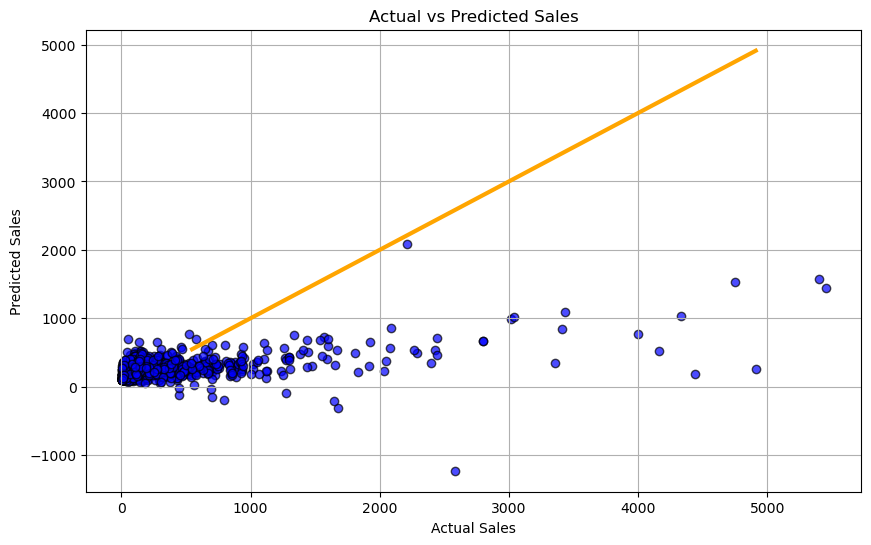

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
start_point = y_test.min() + (y_test.max() - y_test.min()) * 0.1
end_point = y_test.max() - (y_test.max() - y_test.min()) * 0.1
plt.plot([start_point, end_point], [start_point, end_point], color='orange', linestyle='-', linewidth=3)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

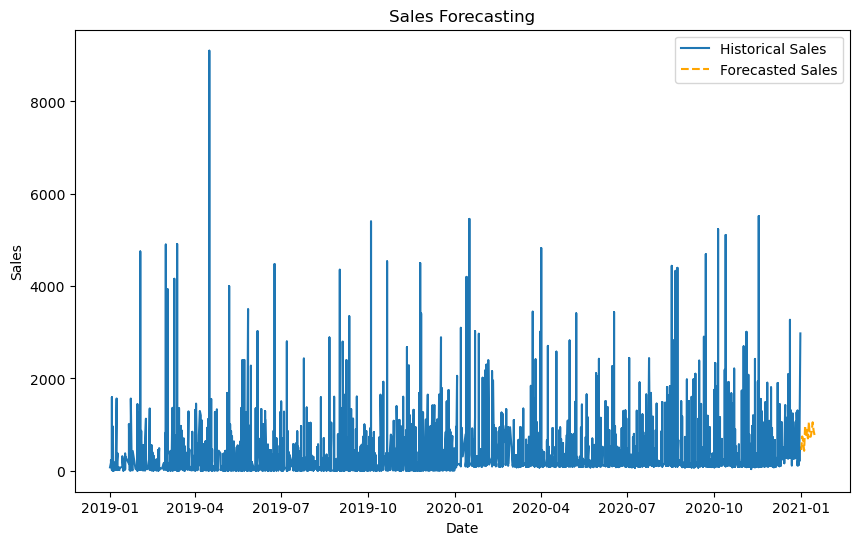

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(data['Order Date'], data['Sales'], label="Historical Sales")
plt.plot(future_dates, future_sales_pred, label="Forecasted Sales", linestyle='--', color='orange')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecasting")
plt.legend()
plt.show()

In [63]:
increase_factor = 1.1 
y_train_modified = y_train * increase_factor

In [65]:
model.fit(X_train, y_train_modified)

LinearRegression()

In [67]:
y_pred_modified = model.predict(X_test)


In [69]:
modified_predictions_df = pd.DataFrame({
    'Actual Sales': y_test,
    'Original Prediction': y_pred,
    'Modified Prediction': y_pred_modified
})
modified_predictions_df.to_csv('/Users/sohamajmera/Downloads/modified_forecast.csv', index=False)
print("Modified forecast saved to modified_forecast.csv")

Modified forecast saved to modified_forecast.csv
